# Trying out Hough projection

In [1]:
# Global imports and settings (from Gilles)

# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["figure.max_open_warning"] = -1

# Print options
import numpy as np
np.set_printoptions(precision=3)

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

Generating a list of points in a plane, belonging to n lines. The number of lines is determined by the "labels" list

In [2]:
# Generating datasets for lines, our data will be a list of 2D points...
def createLine(p):
    
    print "Created line with params:", p
    print  "Slope = ", np.arctan(p[1])
    x = np.linspace(-5, 5, 2000)
    y = p[0] + x * p[1] * 5
    
    X = np.transpose(np.vstack((x, y)))
    return X

def createLabeledLine(label, p):
    X = createLine(p)
    y = np.array([ label ] * X.shape[0])
    return X,y
    

def createTrackSet(labels, params):
    hits = np.empty((0, 2))
    track = None
    count = 0
    for c in labels:
        (X, y) = createLabeledLine(c, params[count])
        hits = np.vstack((hits, X))
        if track == None:
             track = y
        else:
            track = np.hstack((track, y))
        count += 1
        
    # Now shuffling the data
    from sklearn.utils import shuffle
    X, y = shuffle(hits, track)
    return X, y

# Creating our data sets
labels = [ "r", "g", "b", "c"]
params = np.array([[-1.398 , 1.64 ],
          [ 1.959 , 0.496], 
          [ 0.962 , 1.379],
          [ 0.4   , 0.592]])

X, y = createTrackSet(labels, params)





Created line with params: [-1.398  1.64 ]
Slope =  1.02323409085
Created line with params: [ 1.959  0.496]
Slope =  0.460442491771
Created line with params: [ 0.962  1.379]
Slope =  0.943381195356
Created line with params: [ 0.4    0.592]
Slope =  0.534516381118


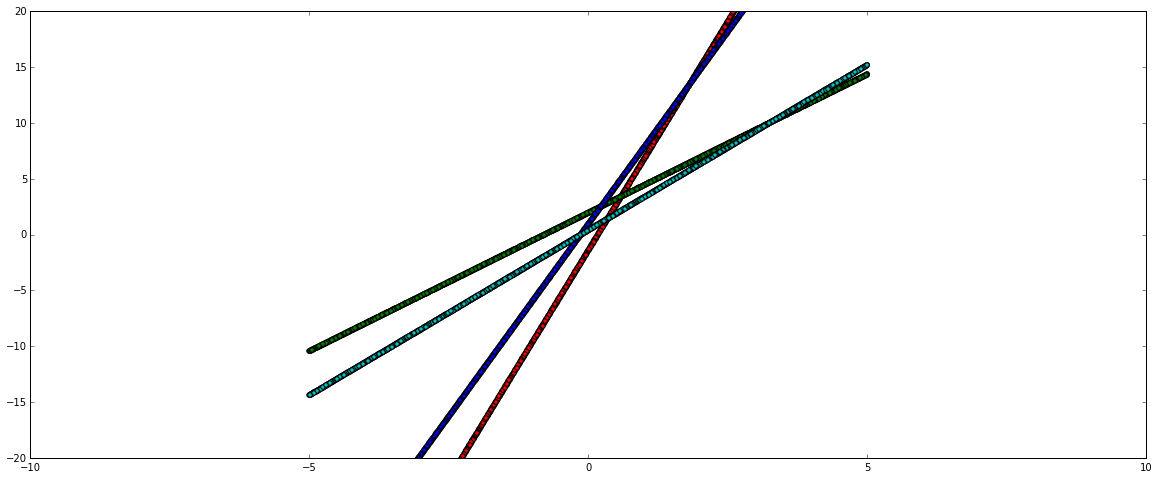

In [3]:
# Printing our tracks to check...
for label in labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=label)
plt.xlim(-10, 10)
plt.ylim(-20, 20)
plt.axis('on')
plt.savefig("lines.png")
plt.show()


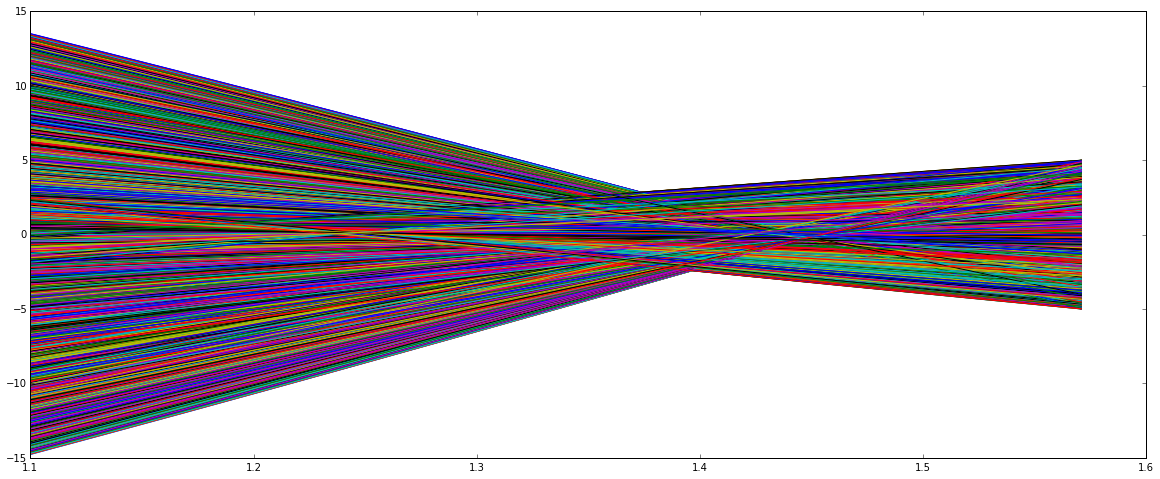

In [26]:
def dist(alpha, xa, ya):
    """ Absolute distance to the origin """
    x = np.sin(alpha) * (xa * np.sin(alpha) - ya * np.cos(alpha))
    y = np.cos(alpha) * (ya * np.cos(alpha) - xa * np.sin(alpha))
    return np.sqrt(x * x + y * y)

def sdist(alpha, xa, ya):
    """ Modified distance with a sign, always used fo Hough transform
    As we plot on theta = 0, pi, we convert the distance to center 
    to negative for angles between pi and 2pi """
    x = np.sin(alpha) * (xa * np.sin(alpha) - ya * np.cos(alpha))
    y = np.cos(alpha) * (ya * np.cos(alpha) - xa * np.sin(alpha))
    return np.sign(y) * np.sqrt(x * x + y * y)


#alphas = np.linspace(- np.pi / 2, np.pi /2, 10000)
alphas = np.linspace(1.1, np.pi /2, 1000)
projections = None

for (x,y) in X:
    #print np.vstack((alphas, dist(alphas, x, y)))
    #print x, y
    tmp =  np.transpose(np.vstack((alphas, sdist(alphas, x, y))))
    if projections == None:
        projections = tmp
    else:
        projections = np.vstack((projections,  tmp))
    
    plt.plot(alphas, sdist(alphas, x, y))   
    

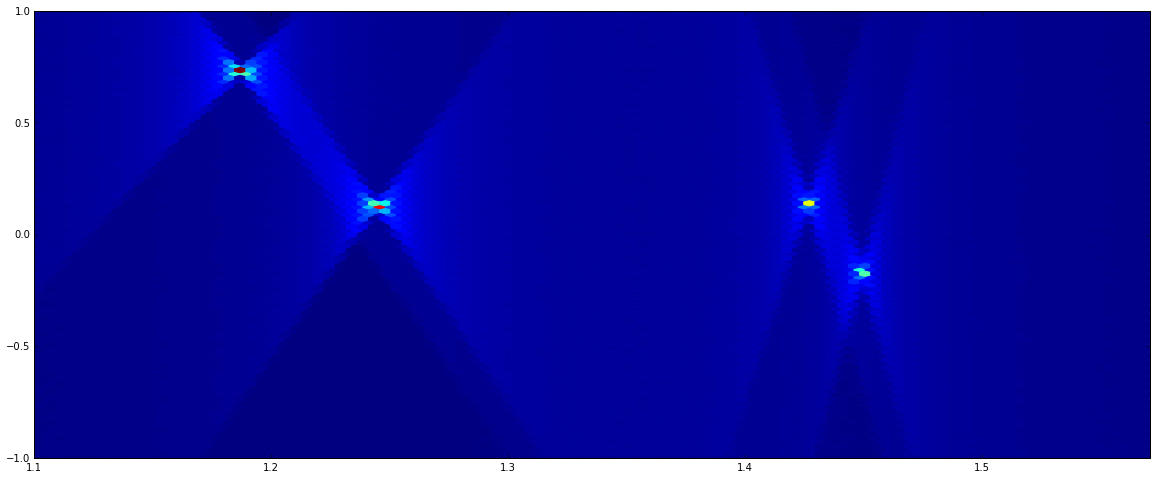

In [27]:
mask = (projections[:, 0] > 1) & (abs(projections[:, 1]) < 1)
plt.hexbin(projections[mask, 0], projections[mask, 1])



In [28]:
print 3 +4 

7
